In [1]:
import pandas as pd
from fbprophet import Prophet

In C:\Users\takas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\takas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\takas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\takas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\takas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
_df = pd.read_csv("https://www.tepco.co.jp/forecast/html/images/juyo-2017.csv", encoding='shift-jis', skiprows=1)

In [3]:
_df.head()

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389


In [4]:
_df.shape

(8760, 3)

In [5]:
years = [2017, 2018, 2019]

#year = years[1]
df = pd.DataFrame()
for year in years:
    _df = pd.read_csv(f"https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv", encoding='shift-jis', skiprows=1)
    df = pd.concat([df, _df], axis=0)

In [6]:
df.head()

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389


In [7]:
df.tail()

,DATE,TIME,実績(万kW)
8755,2019/12/31,19:00,3302
8756,2019/12/31,20:00,3263
8757,2019/12/31,21:00,3182
8758,2019/12/31,22:00,3077
8759,2019/12/31,23:00,3029


In [8]:
df.shape

(26280, 3)

In [9]:
df = df.reset_index(drop=True)

In [10]:
df['DATE'][0]

'2017/1/1'

In [11]:
df['TIME'][0]

'0:00'

In [12]:
date = df['DATE'][0]
time = df['TIME'][0]
str_datetime = f'{date} {time}'
str_datetime

'2017/1/1 0:00'

In [13]:
from datetime import datetime as dt

In [14]:
datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')

In [15]:
datetime

datetime.datetime(2017, 1, 1, 0, 0)

In [16]:
datetimes = []

for index, datum in df.iterrows():

    date = datum['DATE']
    time = datum['TIME']
    str_datetime = f'{date} {time}'
    datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
    datetimes.append(datetime)

In [17]:
datetimes[:3]

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 1, 0),
 datetime.datetime(2017, 1, 1, 2, 0)]

In [18]:
df['ds'] = datetimes

In [19]:
df.head()

,DATE,TIME,実績(万kW),ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00


In [20]:
df = df.rename(columns={'実績(万kW)': 'y'})
df

,DATE,TIME,y,ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00
...,...,...,...,...
26275,2019/12/31,19:00,3302,2019-12-31 19:00:00
26276,2019/12/31,20:00,3263,2019-12-31 20:00:00
26277,2019/12/31,21:00,3182,2019-12-31 21:00:00
26278,2019/12/31,22:00,3077,2019-12-31 22:00:00


In [21]:
model = Prophet()

In [22]:
model.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
C:\Users\takas\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [40]:
future = model.make_future_dataframe(24*365, freq='H')

In [41]:
future.tail()

,ds
35035,2020-12-30 19:00:00
35036,2020-12-30 20:00:00
35037,2020-12-30 21:00:00
35038,2020-12-30 22:00:00
35039,2020-12-30 23:00:00


In [42]:
future = model.make_future_dataframe(24*366, freq='H')

In [43]:
future.tail()

,ds
35059,2020-12-31 19:00:00
35060,2020-12-31 20:00:00
35061,2020-12-31 21:00:00
35062,2020-12-31 22:00:00
35063,2020-12-31 23:00:00


In [44]:
forecast = model.predict(future)

In [28]:
import matplotlib.pyplot as plt

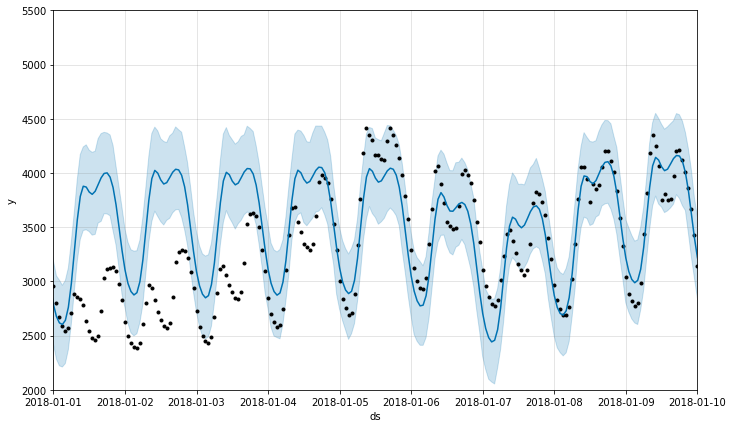

In [49]:
model.plot(forecast)
plt.xlim(dt(2018, 1, 1), dt(2018, 1, 10))
plt.ylim(2000,5500)
plt.show()

In [50]:
df_2020 = pd.read_csv("https://www.tepco.co.jp/forecast/html/images/juyo-2020.csv", encoding='shift-jis', skiprows=1)

In [51]:
df_2020.head()

,DATE,TIME,実績(万kW)
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [52]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
35059,2020-12-31 19:00:00,2734.531447,777.637118,5891.266084,169.351949,5150.013625,673.651626,673.651626,673.651626,396.229024,...,120.975497,120.975497,120.975497,156.447105,156.447105,156.447105,0.0,0.0,0.0,3408.183074
35060,2020-12-31 20:00:00,2734.486551,711.394392,5889.297417,169.062480,5150.353560,569.936030,569.936030,569.936030,292.171591,...,121.384536,121.384536,121.384536,156.379904,156.379904,156.379904,0.0,0.0,0.0,3304.422581
35061,2020-12-31 21:00:00,2734.441654,551.336426,5616.196103,168.773012,5150.693495,404.371381,404.371381,404.371381,126.184316,...,121.868095,121.868095,121.868095,156.318969,156.318969,156.318969,0.0,0.0,0.0,3138.813035
35062,2020-12-31 22:00:00,2734.396757,242.400370,5406.992284,168.483543,5151.033430,193.201470,193.201470,193.201470,-85.473335,...,122.410488,122.410488,122.410488,156.264317,156.264317,156.264317,0.0,0.0,0.0,2927.598227
35063,2020-12-31 23:00:00,2734.351861,125.100392,5150.180922,168.194075,5151.373364,-24.939985,-24.939985,-24.939985,-304.147588,...,122.991642,122.991642,122.991642,156.215961,156.215961,156.215961,0.0,0.0,0.0,2709.411876


In [60]:
forecast_2020 = forecast[forecast['ds'] >= dt(2020, 1, 1)].reset_index(drop=True)

In [61]:
forecast_2020.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,3128.679143,2509.202783,3285.029299,3128.679143,3128.679143,-221.795040,-221.795040,-221.795040,-488.418488,...,108.739762,108.739762,108.739762,157.883686,157.883686,157.883686,0.0,0.0,0.0,2906.884104
1,2020-01-01 01:00:00,3128.634247,2368.991941,3147.376379,3128.634247,3128.634247,-351.489549,-351.489549,-351.489549,-617.311809,...,108.085762,108.085762,108.085762,157.736498,157.736498,157.736498,0.0,0.0,0.0,2777.144698
2,2020-01-01 02:00:00,3128.589350,2334.175685,3092.366648,3128.589350,3128.589350,-429.112705,-429.112705,-429.112705,-694.378169,...,107.670104,107.670104,107.670104,157.595360,157.595360,157.595360,0.0,0.0,0.0,2699.476645
3,2020-01-01 03:00:00,3128.544453,2278.110892,3057.500269,3128.544453,3128.544453,-463.016122,-463.016122,-463.016122,-727.962708,...,107.486297,107.486297,107.486297,157.460289,157.460289,157.460289,0.0,0.0,0.0,2665.528331
4,2020-01-01 04:00:00,3128.499557,2331.070796,3072.280186,3128.499557,3128.499557,-443.289058,-443.289058,-443.289058,-708.144239,...,107.523878,107.523878,107.523878,157.331303,157.331303,157.331303,0.0,0.0,0.0,2685.210499


In [69]:
df_2020 = df_2020.rename(columns={"実績(万kW)":"y"})

In [70]:
#forecast_2020['yhat']

In [73]:
#実測値
results['t'] = df_2020['y']
#予測値
results['y'] = forecast_2020['yhat']
results['diff'] = results['t'] - results['y']

In [74]:
results.head()

,t,y,diff
0,2857,2906.884104,-49.884104
1,2703,2777.144698,-74.144698
2,2602,2699.476645,-97.476645
3,2520,2665.528331,-145.528331
4,2464,2685.210499,-221.210499


In [75]:
#MAPE mean absolute percent error
import numpy as np

In [78]:
np.mean(abs((results['y'] - results['t'])/results['t'])*100)
#実際の値から〇〇%離れてますよ

10.459165347753755

In [80]:
df_holidays = pd.read_csv('holidays+hotdays+hour_2017_2019.csv')
df_holidays.head()

,ds,holiday,lower_window,upper_window
0,2017/01/01 0:00:00,holiday,0,1
1,2017/01/01 1:00:00,holiday,0,1
2,2017/01/01 10:00:00,holiday,0,1
3,2017/01/01 11:00:00,holiday,0,1
4,2017/01/01 12:00:00,holiday,0,1


In [81]:
df.y.max()

5653

In [82]:
df['cap'] = 5700
df.head()

,DATE,TIME,y,ds,cap
0,2017/1/1,0:00,2783,2017-01-01 00:00:00,5700
1,2017/1/1,1:00,2634,2017-01-01 01:00:00,5700
2,2017/1/1,2:00,2520,2017-01-01 02:00:00,5700
3,2017/1/1,3:00,2438,2017-01-01 03:00:00,5700
4,2017/1/1,4:00,2389,2017-01-01 04:00:00,5700


In [83]:
model = Prophet(growth="logistic", yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, holidays=df_holidays)

In [84]:
model.fit(df)

C:\Users\takas\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [85]:
future['cap'] = 5700
forecast = model.predict(future)

(17532.0, 17541.0)

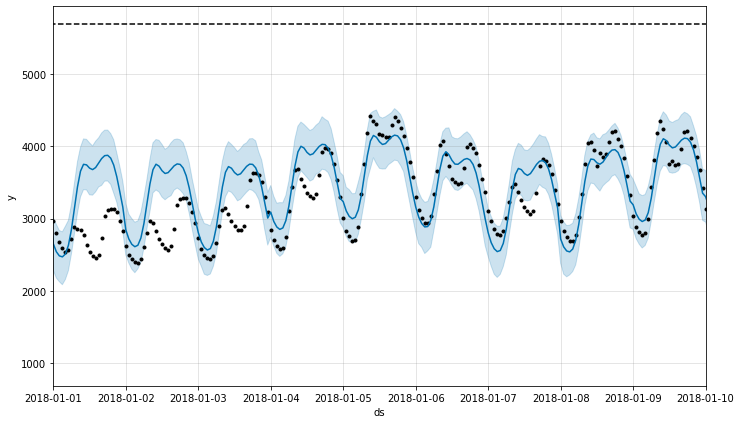

In [86]:
model.plot(forecast)
plt.xlim(dt(2018, 1, 1), dt(2018, 1, 10))

In [89]:
forecast_2020 = forecast[forecast['ds'] >= dt(2020, 1, 1)].reset_index(drop=True)

In [90]:
#実測値
results['t'] = df_2020['y']
#予測値
results['y'] = forecast_2020['yhat']
results['diff'] = results['t'] - results['y']

In [91]:
np.mean(abs((results['y'] - results['t'])/results['t'])*100)

8.903601691781072

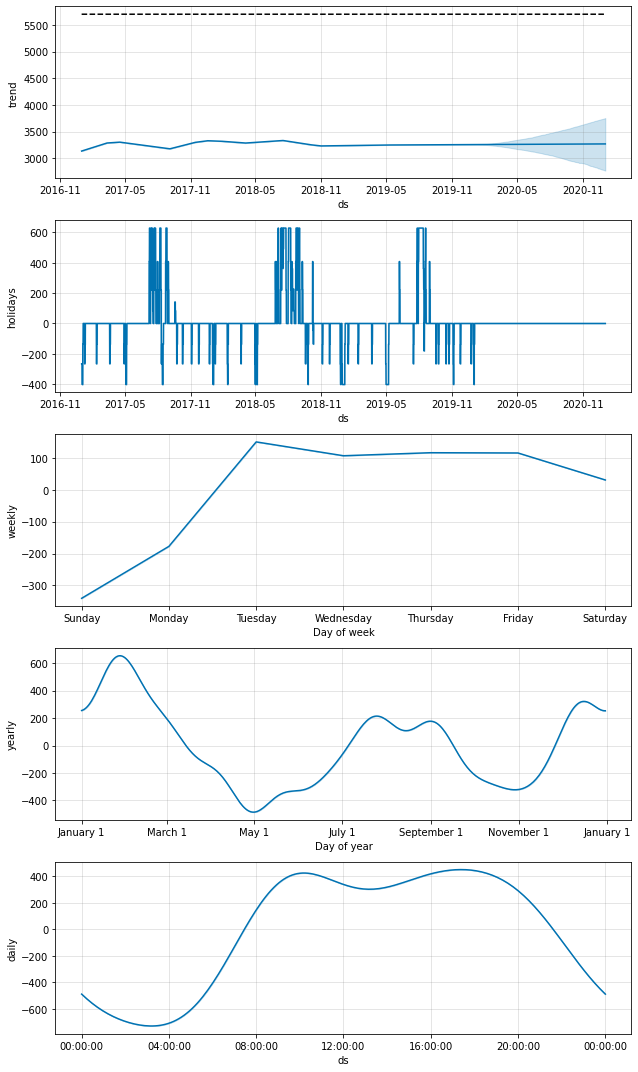

In [93]:
model.plot_components(forecast)
plt.show()